In [52]:
import os

import scipy.stats as ss
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import category_encoders as ce
import pickle


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # nice visualisations
import matplotlib.pyplot as plt # basic visualisation library
import datetime as dt # library to opearate on dates

from Data_cleaning.customers_cleaning import *

print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))


from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

pandas version: 1.2.4
numpy version: 1.20.1
seaborn version: 0.11.2


In [53]:
dataset_dict={"articles":"articles.csv","customers":"customers.csv","transactions":"transactions_train.csv"}

path = '../dataset'

df_articles=pd.read_csv(os.path.join(path,dataset_dict["articles"]))
df_customers=pd.read_csv(os.path.join(path,dataset_dict["customers"]))
df_transactions=pd.read_csv(os.path.join(path,dataset_dict["transactions"]))

In [48]:
df_transactions.head(10)

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
5,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687001,0.016932,2
6,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221001,0.020322,2
7,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,688873012,0.030492,1
8,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,501323011,0.053373,1
9,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,598859003,0.045746,2


In [4]:
df_transactions.nunique()

t_dat                   734
customer_id         1362281
article_id           104547
price                  9857
sales_channel_id          2
dtype: int64

In [14]:
df_transactions.groupby(['customer_id','article_id'])


t_dat  price  \
customer_id                                        article_id                 
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d... 176209023       1      1   
                                                   568601006       2      2   
                                                   568601043       1      1   
                                                   607642008       1      1   
                                                   625548001       1      1   
...                                                              ...    ...   
ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38b... 821395003       1      1   
                                                   840360003       1      1   
                                                   866755002       2      2   
                                                   882810001       1      1   
ffffd9ac14e89946416d80e791d064701994755c3ab686a... 806050001       1      1   

                                                               sales_channel_id  
customer_id                                        article_id                    
00000dbacae5abe5e23885899a1fa44253a17956c6d1c3d... 176209023                  1  
                                                   568601006                  2  
                                                   568601043                  1  
                                                   607642008                  1  
                                                   625548001                  1  
...                                                                         ...  
ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38b... 821395003                  1  
                                                   840360003                  1  
                                                   866755002                  2  
                                                   882810001                  1  
ffffd9ac14e89946416d80e791d064701994755c3ab686a... 806050001                  1  

[27306439 rows x 3 columns]

In [ ]:
df_transactions.customer_id.nunique()

In [3]:
df_transactions

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [4]:
df_customers.nunique()


customer_id               1371980
FN                              1
Active                          1
club_member_status              3
fashion_news_frequency          4
age                            84
postal_code                352899
dtype: int64

In [ ]:
df_transactions.groupby('price').size().reset_index(name='counts')


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(df_transactions.groupby('price').size().reset_index(name='counts')
)

In [ ]:
kmeans

In [7]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [8]:
kmeans.cluster_centers_

array([[9.81745412e-02, 1.38481438e+03],
       [2.71016949e-02, 2.01674133e+06]])

In [19]:
kmeans = KMeans(n_clusters=2, random_state=0).fit_predict()

In [34]:
df_transactions.groupby(['price']).size().reset_index(name='counts')

,price,counts
0,0.000017,1
1,0.000034,3
2,0.000051,2
3,0.000102,3
4,0.000119,4
...,...,...
9852,0.503288,2
9853,0.503508,1
9854,0.506780,144
9855,0.532373,1


In [24]:
df_transactions.groupby(['price']).size().sort_values(ascending=False).reset_index(name='counts')

,price,counts
0,0.016932,3416921
1,0.033881,3406538
2,0.025407,3266926
3,0.013542,1497769
4,0.050831,1494130
...,...,...
9852,0.071441,1
9853,0.108932,1
9854,0.108983,1
9855,0.109000,1


In [45]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=df_transactions.groupby(['price']).size().sort_values(ascending=False).reset_index(name='counts'), x='price',kde=True)
ax.set_xlabel('Distribution of the price')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
plt.show()


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fd73d0bfca0> (for post_execute):



KeyboardInterrupt



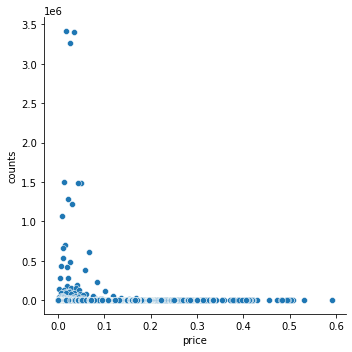

In [32]:
ax = sns.relplot(data=df_transactions.groupby(['price']).size().sort_values(ascending=False).reset_index(name='counts'), x='price', y="counts")
plt.show()

UndefinedVariableError: name 'period' is not defined

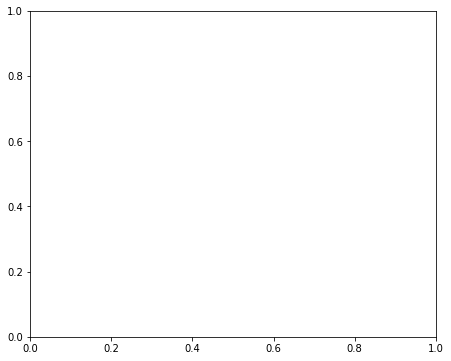

In [51]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.histplot(x="earliest", hue="index_group_name", multiple="stack", data=df_articles.query("period != 0"))
plt.subplot(1, 2, 2)
sns.histplot(x="latest", hue="index_group_name", multiple="stack", data=df_articles.query("period != 0"))


In [60]:
df_transactions

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [69]:
df_transactions['2020-09-16' <= df_transactions['t_dat']].size / df_transactions.size


0.007559725388479116

In [78]:
df_transactions[('2019-09-23' <= df_transactions['t_dat']) & (df_transactions['t_dat'] <= '2019-09-29')].size / df_transactions.size

0.013320110868380478

In [79]:
df_transactions[('2018-09-23' <= df_transactions['t_dat']) & (df_transactions['t_dat'] <= '2018-09-29')].size / df_transactions.size


0.013940841926740145

In [80]:
df_transactions.head()


,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
